<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage" />
</a>

<h1>Classifying European Money Denominations</h1>

<h2>Table of Contents</h2>

<p>In this lab, you will learn how to load images as dataset that can be used to do prediction.</p>
<ul>
    <li><a href="#load_CSV">Load CSV</a></li>
    <li><a href="#load_image">Load Image</a></li>
    <li><a href="#data_class">Create a Dataset Class</a></li>
    <li><a href="#ques">Questions</a>
        <ol>
            <li><a href="#q21">Question 2.1</a></li>
            <li><a href="#q22">Question 2.2</a></li>
        </ol>
    </li>
    <li><a href="#test_trans">Test Transform</a></li>
</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>

<h2>Preparation</h2>

<a href="https://cocl.us/DL0320EN_storage">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/ObjectStorage.png" width="750" alt="cognitive class" />
</a>

Download the datasets you needed for this lab.

In [1]:
# You can comment the code in this box out if you already have the dataset.
# Step 1: Ctrl + A : Select all
# Step 2: Ctrl + / : Comment out all; if everything selected has been comment out alreaday, then uncomment all

# Download Training Dataset
!wget --quiet -O /resources/data/training_data_pytorch.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_PYTORCH
!tar -xzf  /resources/data/training_data_pytorch.tar.gz -C /resources/data --exclude '.*'

# Download Validation Dataset
!wget --quiet -O /resources/data/validation_data_pytorch.tar.gz https://cocl.us/DL0320EN_VALID_TAR_PYTORCH
!tar -xzf  /resources/data/validation_data_pytorch.tar.gz -C /resources/data --exclude '.*'

The following are the PyTorch modules you are going to need

In [2]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader
import pandas
from torchvision import transforms

Import Non-PyTorch Modules 

In [3]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
from PIL import Image

<hr>

<h2 id="load_CSV">Load CSV</h2>

In this section, you will load the CSV with Pandas. The CSV file contains the name of the image file as well as the class label. 

The denomination, file name and the class variable for the training data is stored in the following CSV file.

<h3>Training Data CSV</h3>

In [4]:
# train_csv_file contains the URL that contains the CSV file we needed

train_csv_file = 'https://cocl.us/DL0320EN_TRAIN_CSV'

You can load the CSV file and convert it into a dataframe , using the Pandas function <code>read_csv()</code> . You can view the dataframe using the method head.

In [5]:
# Read CSV file from the URL and print out the first five samples

train_data_name = pd.read_csv(train_csv_file)
train_data_name.head()

,Unnamed: 0,denomination,filename,y
0,0,5,0.jpeg,0
1,1,5,1.jpeg,0
2,2,5,2.jpeg,0
3,3,5,3.jpeg,0
4,4,5,4.jpeg,0


The first column of the dataframe corresponds to the sample number. The second column is the denomination. The third column is the file name, and the final column is the class variable. The correspondence between the class variable and each denomination is as follows. Five Euros have <i>y</i> equal 0; ten Euros have <i>y</i> equals 1; twenty Euros have <i>y</i> equals 2 and so on.

You can obtain the file name of the first file by using the method  <code> <i>DATAFRAME</i>.iloc[0, 2]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index. 

In [6]:
# Get the value on location row 0, column 2 (Notice that index starts at 0.)

print('File name:', train_data_name.iloc[0, 2])

File name: 0.jpeg


As the class of the sample is in the fourth row, you can also obtain the class value as follows.

In [7]:
# Get the value on location row 0, column 3 (Notice that index starts at 0.)

print('y:', train_data_name.iloc[0, 3])

y: 0


Similarly, You can obtain the file name of the second image file and class number:

In [8]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', train_data_name.iloc[1, 2])
print('y:', train_data_name.iloc[1, 3])

File name: 1.jpeg
y: 0


The number of samples corresponds to the number of rows in a dataframe. You can obtain the number of rows using the following lines of code. This will correspond the data attribute <code>len</code>.

In [9]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', train_data_name.shape[0])

The number of rows:  70


<h3>Validation</h3>

We can do the same for the validation data. The data is stored in the following CSV file:

In [10]:
# The url for getting csv file for validation dataset

validation_csv_file='https://cocl.us/DL0320EN_VALID_CSV'

<h3>Try</h3> 

Load the CSV file that contains the validation data names and labels as a dataframe.

In [11]:
validation_data_name = pd.read_csv(validation_csv_file)
validation_data_name.head()

,Unnamed: 0,denomination,filename,y
0,0,5,0.jpeg,0
1,1,5,1.jpeg,0
2,2,5,2.jpeg,0
3,3,5,3.jpeg,0
4,4,5,4.jpeg,0


Load the 11th sample image name and class label

In [12]:
print("The file name: ", validation_data_name.iloc[10, 2])
print("The class label: ", validation_data_name.iloc[10, 3])

The file name:  10.jpeg
The class label:  1


<hr>

<h2 id="load_image">Load Image</h2>

<h3>Training Images</h3>

The training images are stored in the following directory 
<code>/resources/data/training_data_pytorch/</code>, you can save it in the variable <code>train_data_dir</code>.

In [13]:
# Save the image folderpath in a variable

train_data_dir = '/resources/data/training_data_pytorch/'

You can find the file name of a particular image from the Dataframe 

In [14]:
# Print the file name on the second row

train_data_name.iloc[1, 2]

'1.jpeg'

To load the image, you need the directory and the image name. You can concatenate the variable <code>train_data_dir</code> with the name of the image stored in a Dateframe. Finally, you will store the result in the variable <code>train_image_name</code>

In [15]:
# Combine the directory path with file name

train_image_name = train_data_dir + train_data_name.iloc[1, 2]

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code>.

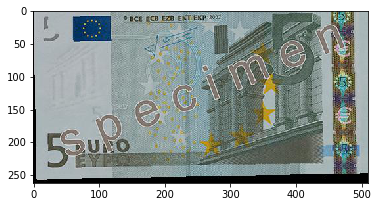

In [16]:
# Plot the second training image

image = Image.open(train_image_name)
plt.imshow(image)
plt.show()

You can repeat the process for the 20th image.

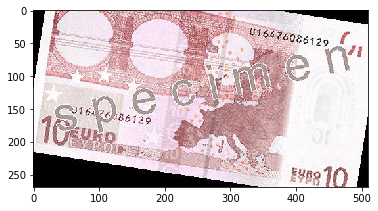

In [17]:
# Plot the 20th image

train_image_name = train_data_dir + train_data_name.iloc[19, 2]
image = Image.open(train_image_name)
plt.imshow(image)
plt.show()

<h3>Validation Images</h3>

The Validation data is stored in the following directory <code>/resources/data/validation_data_pytorch/</code>. You can assign it to the variable <code>validation_data_dir</code>.

In [18]:
# Save the image folderpath in a variable

validation_data_dir='/resources/data/validation_data_pytorch/'

<h3>Try</h3> 

Use the same procedure as above to load and plot the second validation image in the validation set:

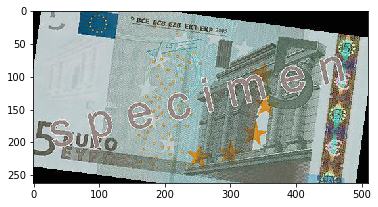

In [19]:
validation_data_name = pd.read_csv(validation_csv_file)
validation_image_name = validation_data_dir + validation_data_name.iloc[1, 2]
image = Image.open(validation_image_name)
plt.imshow(image)
plt.show()

<hr>

<h2 id="data_class">Create a Dataset Class</h2>

In this section, you will Complete the Dataset object, and the variable names are given . This will be a generalization of the above sections. Complete the following <code>Dataset</code> class:

In [20]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(csv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=self.data_dir + self.data_name.iloc[idx, 2]
        
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 3]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

<hr>

<h2 id="ques">Questions</h2>

In this section, you will test your dataset object. A dataset  object will be created and you will test it by viewing the output.

If your dataset class is correct, the following line of code should work.

If your dataset class is correct, the following line of code should construct a dataset object for the training data and validation data. 

In [21]:
# Create the dataset objects

train_dataset = Dataset(csv_file=train_csv_file
                        , data_dir='/resources/data/training_data_pytorch/')
validation_data = Dataset(csv_file=validation_csv_file
                          , data_dir='/resources/data/validation_data_pytorch/')

<h3 id="#q21">Question 2.1</h3>

The following lines of code will print out three sample images and their classes from the training data. Run the code and remember the results; you will be test on the results in the quiz.

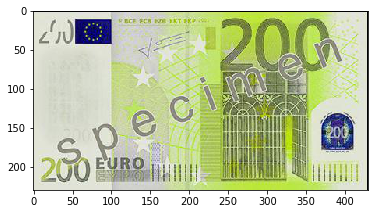

5


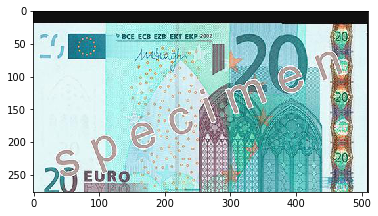

2


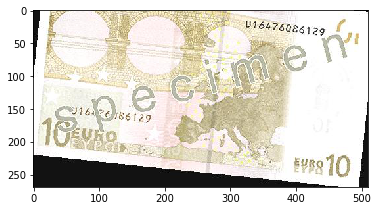

1


In [24]:
# Question 2.1
# Answer the question in the quiz

samples = [53, 23, 10]

for i in samples:
    img, cl = train_dataset.__getitem__(i)
    plt.imshow(img)
    plt.show()
    print(cl)

<h3 id="q22">Question2.2</h3>

The following lines of code will print out three sample images and their class from the validation data. Run the code and remember the results; you will be test on the results in the quiz.

In [ ]:
# Question 2.2
# Answer the question in the quiz

samples =[22, 32, 45]

# Type your code here

<hr>

<h2 id="test_trans">Test Transform</h2>

Use the constructor compose to perform the following sequence of transformations in the order they are given. Then test your dataset class to see if the transform is implemented correctly.

In [ ]:
# Create the transform compose

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor(), transforms.Normalize(mean, std)])

<h3>Try</h3>

Try to create a <code>test_normalization</code> dataset to see if the transform is correct. Use the training dataset.

In [ ]:
# Create a test_normalization dataset using composed as transform
# Won't be graded

# Type your code here

Double-click <b>here</b> for the solution.
<!--
test_normalization = Dataset(csv_file=train_csv_file
                        , data_dir='/resources/data/training_data_pytorch/'
                        , transform = composed)
-->

In [ ]:
# Print mean and std

print("Mean: ", test_normalization[0][0].mean(dim = 1).mean(dim = 1))
print("Std:", test_normalization[0][0].std(dim = 1).std(dim = 1))

If you correctly transform the dataset, the answer should be as following:
<p><i>
    Mean:  tensor([0.4090, 0.6965, 0.9854])
    Std: tensor([0.2493, 0.2633, 0.2477])
</i></p>

<a href="https://cocl.us/DLO0320EN_notebook_bott">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Bottom.png" width="750" alt="cognitive class" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>, <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/">Yi Leng Yao</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.